In [1]:
import torch
import clip
from PIL import Image, ImageDraw
import numpy.random as random
from typing import *




In [19]:
img = Image.new("RGB", (32,32), color=(128, 128, 128))
draw = ImageDraw.Draw(img)
width, height = (32, 32)
x1 = random.randint(0, width-10)
y1 = random.randint(0, height-10)
x2 = random.randint(x1+5, width)
y2 = random.randint(y1+5, height)

draw.rectangle((x1, y1, x2, y2), fill=(255, 0, 0))

In [21]:
x1 = random.randint(10, width)
y1 = random.randint(10, height)
x2 = random.randint(x1 + 5, width)
y2 = random.randint(y1+5, height)
draw.rectangle((x1, y1, x2, y2), fill=(255, 0, 0))
img.show()

In [ ]:
colors = {
    "black": (0, 0, 0),
    "white": (255, 255, 255),
    "red": (255, 0, 0),
    "green": (0, 255, 0),
    "blue": (0, 0, 255),
    "yellow": (255, 255, 0),
    "cyan": (0, 255, 255),
    "magenta": (255, 0, 255),
    "silver": (192, 192, 192),
    "gray": (128, 128, 128),
    "maroon": (128, 0, 0),
    "olive": (128, 128, 0),
    "green": (0, 128, 0),
    "purple": (128, 0, 128),
    "teal": (0, 128, 128),
    "navy": (0, 0, 128),
    "orange": (255, 165, 0),
    "gold": (255, 215, 0),
    "pink": (255, 192, 203),
}

In [3]:
def draw_rectangle(color: str, img_size=(128, 128), bg_color="gray"):
    img = Image.new("RGB", img_size, color=colors[bg_color])
    draw = ImageDraw.Draw(img)
    width, height = img_size
    x1 = random.randint(10, width)
    y1 = random.randint(10, height)
    x2 = random.randint(x1, width)
    y2 = random.randint(y1, height)

    draw.rectangle((x1, y1, x2, y2), fill=colors[color])
    return img


def draw_square(color: str, img_size=(128, 128), bg_color="gray"):
    img = Image.new("RGB", img_size, color=colors[bg_color])
    draw = ImageDraw.Draw(img)
    width, height = img_size
    x1 = random.randint(10, width//2)
    y1 = random.randint(10, height//2)
    x2 = random.randint(x1, width)
    y2 = y1 + x2 - x1

    draw.rectangle((x1, y1, x2, y2), fill=colors[color])
    return img


def draw_ellipse(color: str, img_size=(128, 128), bg_color="gray"):
    img = Image.new("RGB", img_size, color=colors[bg_color])
    draw = ImageDraw.Draw(img)
    width, height = img_size
    x1 = random.randint(10, width//2)
    y1 = random.randint(10, height//2)
    x2 = random.randint(x1*1.5, width)
    y2 = random.randint(y1*1.5, height)

    draw.ellipse((x1, y1, x2, y2), fill=colors[color])
    return img


def draw_circle(color: str, img_size=(128, 128), bg_color="gray"):
    img = Image.new("RGB", img_size, color=colors[bg_color])
    draw = ImageDraw.Draw(img)
    width, height = img_size
    x1 = random.randint(10, width//2)
    y1 = random.randint(10, height//2)
    x2 = random.randint(x1, width)
    y2 = y1 + x2 - x1

    draw.ellipse((x1, y1, x2, y2), fill=colors[color])
    return img


def draw_triangle(color: str, img_size=(128, 128), bg_color="gray"):
    img = Image.new("RGB", img_size, color=colors[bg_color])
    draw = ImageDraw.Draw(img)
    width, height = img_size
    x = random.randint(width*0.3, width*0.7)
    y = random.randint(height*0.3, height*0.7)
    r = random.randint(min(width*0.2, height*0.2), min(width*0.3, height*0.3))
    rotation = random.randint(0, 360)
    draw.regular_polygon((x, y , r), 3, rotation=rotation, fill=colors[color])
    return img


def draw_pentagon(color: str, img_size=(128, 128), bg_color="gray"):
    img = Image.new("RGB", img_size, color=colors[bg_color])
    draw = ImageDraw.Draw(img)
    width, height = img_size
    x = random.randint(width*0.3, width*0.7)
    y = random.randint(height*0.3, height*0.7)
    r = random.randint(min(width*0.2, height*0.2), min(width*0.3, height*0.3))
    rotation = random.randint(0, 360)
    draw.regular_polygon((x, y, r), 5, rotation=rotation, fill=colors[color])
    return img

In [4]:
shapes = {
    "rectangle": draw_rectangle,
    "square": draw_square,
    "ellipse": draw_ellipse,
    "circle": draw_circle,
    "triangle": draw_triangle,
    "pentagon": draw_pentagon,
}

In [83]:
# import os


# pairs = [(color, shape) for color in colors if color != "gray" for shape in shapes]
# train_images_per_class = 100
# test_images_per_class = 30

# for color, shape in pairs:
#     class_name = "an " if color[0] in ['a', 'e', 'i', 'o', 'u'] else "a "
#     class_name += color + " " + shape
#     train_dir = "data/train/" + class_name
#     test_dir = "data/test/" + class_name
#     os.mkdir(train_dir)
#     os.mkdir(test_dir)
#     draw_func = shapes[shape]
#     # color = colors[color]

#     for i in range(train_images_per_class):
#         img = draw_func(color)
#         img.save(f"{train_dir}/{i}.png")

#     for i in range(test_images_per_class):
#         img = draw_func(color)
#         img.save(f"{test_dir}/{i}.png")


In [6]:
import os
import pandas as pd

def generate_data(pairs, n_per_class, dir):
    n = 1
    images = []
    captions = []
    for color, shape in pairs:
        caption = "an " if color[0] in ['a', 'e', 'i', 'o', 'u'] else "a "
        caption += color + " " + shape
        draw_func = shapes[shape]

        for i in range(n_per_class):
            img = draw_func(color)
            img_name = f"{n}.png"
            img.save(f"{dir}/{img_name}")
            images.append(img_name)
            captions.append(caption)
            n += 1

    return images, captions


In [8]:
train_images_per_class = 100
test_images_per_class = 30
train_dir = "./data/train"
test_dir = "./data/test"
train_img_dir = train_dir + "/images"
test_img_dir = test_dir + "/images"

pairs = [(color, shape) for color in colors if color != "gray" for shape in shapes]

train_images, train_captions = generate_data(pairs, train_images_per_class, train_img_dir)
test_images, test_captions = generate_data(pairs, test_images_per_class, test_img_dir)

train_df = pd.DataFrame({"caption": train_captions, "image": train_images})
test_df = pd.DataFrame({"caption": test_captions, "image": test_images})

train_df.to_csv(train_dir + "/data.csv")
test_df.to_csv(test_dir + "/data.csv")





In [ ]:


pairs = [(color, shape) for color in colors if color != "gray" for shape in shapes]
train_images_per_class = 100
test_images_per_class = 30

img_name = 1

for color, shape in pairs:
    caption = "an " if color[0] in ['a', 'e', 'i', 'o', 'u'] else "a "
    caption += color + " " + shape
    train_dir = "./data/train/images"
    test_dir = "./data/test/images"
    os.mkdir(train_dir)
    os.mkdir(test_dir)
    draw_func = shapes[shape]
    # color = colors[color]

    def return_df(n_images, i, dir, color):
        for j in range(n_images):
            img = draw_func(color)
            img.save(f"{dir}/{i}.png")

    for i in range(train_images_per_class):
        img = draw_func(color)
        img.save(f"{train_dir}/{i}.png")

    for i in range(test_images_per_class):
        img = draw_func(color)
        img.save(f"{test_dir}/{i}.png")


In [75]:
img = draw_triangle("black")
img.save("exp1.png", quality=100)


In [8]:
im = Image.new('RGB', (128, 128), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [9]:
draw.ellipse((10, 10, 50, 50), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.line((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw.jpg', quality=95)


In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

In [23]:
shapes = ["rectangle", "triangle", "circle", "square", "oval", "star", "heart"]
colors = ["red", "blue", "white", "black", "yellow", "green", "orange", "purple", "brown", "pink", "grey"]
captions = [f'a {color} {shape}' for color in colors for shape in shapes]
print(captions)

['a red rectangle', 'a red triangle', 'a red circle', 'a red square', 'a red oval', 'a red star', 'a red heart', 'a blue rectangle', 'a blue triangle', 'a blue circle', 'a blue square', 'a blue oval', 'a blue star', 'a blue heart', 'a white rectangle', 'a white triangle', 'a white circle', 'a white square', 'a white oval', 'a white star', 'a white heart', 'a black rectangle', 'a black triangle', 'a black circle', 'a black square', 'a black oval', 'a black star', 'a black heart', 'a yellow rectangle', 'a yellow triangle', 'a yellow circle', 'a yellow square', 'a yellow oval', 'a yellow star', 'a yellow heart', 'a green rectangle', 'a green triangle', 'a green circle', 'a green square', 'a green oval', 'a green star', 'a green heart', 'a orange rectangle', 'a orange triangle', 'a orange circle', 'a orange square', 'a orange oval', 'a orange star', 'a orange heart', 'a purple rectangle', 'a purple triangle', 'a purple circle', 'a purple square', 'a purple oval', 'a purple star', 'a purple

In [18]:
im = Image.new('RGB', (500, 300), (128, 128, 128))
draw = ImageDraw.Draw(im)


In [20]:
draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((200, 100, 300, 200), fill=(0, 192, 192), outline=(255, 255, 255))

im.save('pillow_imagedraw1.jpg', quality=95)


In [27]:
image = preprocess(Image.open("pillow_imagedraw1.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(captions).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# print("Label probs:", probs)

In [28]:
# Pick the top 5 most similar labels for the image
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
values, indices = similarity[0].topk(5)

# Print the result
print("\nTop predictions:\n")
for value, index in zip(values, indices):
    print(f"{captions[index]}: {100 * value.item():.2f}%")


Top predictions:

a red rectangle: 21.17%
a blue rectangle: 10.46%
a blue square: 5.88%
a red oval: 5.51%
a orange square: 4.37%


In [5]:
from generate_dataset import Drawing

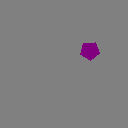

'a purple pentagon at the top right'

In [19]:
d = Drawing(imagesize=(128, 128), background_color="gray", excluded=[("gray"), ("white", "rectangle"), ("circle")])
d.add_random_figures(1, min_length=20)
display(d.image)
d.caption(size_drop_prob=0.3, pos_drop_prob=0.3)

In [21]:
excluded=[("gray",), ("white"), ("circle")]
excluded
len(excluded[1])

5